# Статистика, DS-поток
## Практическое задание 2


**Правила:**

* Дедлайн **10 октября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds20_bot`.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  10 баллов
* Задача 2 -  5 баллов
* Задача 3 -  5 баллов
* Задача 4 -  5 баллов
* Задача 5 -  20 баллов
* Задача 6 -  15 баллов

In [4]:
import numpy as np
import scipy.stats as sps
from scipy.special import factorial
import matplotlib.pyplot as plt
%matplotlib inline

-----

## Задача 1. 
В этой задаче предлагается изучить *свойство несмещённости*.


**1.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$ параметра $\theta$.

Какие из этих оценок являются несмещенными?

**Ответ:** пользуясь ответами к $1$-й задаче второго теор. задания, имеем: $X_{(n)}$ является смещённой, $\frac{n+1}{n}X_{(n)}, 2\overline{X}$ являются несмещёнными. 

Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$:

Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $U[0, 1]$. Далее вычислите среднее этих оценок, которое обозначим $\overline{\theta}$.

Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\overline{\theta}, y)$, где $y$ -- произвольные различные (например 0, 1, 2) координаты для трёх различных типов оценок.

Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение трёх типов оценок и их среднее.

Копипаста неприемлема, используйте циклы и функции.

Используйте данный шаблон для визуализации значений:

In [2]:
k = 500

def generate_samples(k, n, r_type='uniform'):
    """
    Генерирует выборку из либо U[0, 1], либо N(0, sigma^2) размера (k, n).
        
    Аргументы:
        k --- число повторений генерации.
        n --- число значений в одной выборке.
        
    Исключения:
        Кидает RuntimeError, если тип распределения некорректный.
                            
    Возвращает:
        numpy array размера (k, n)
    """
    if r_type == 'uniform':
        return sps.uniform.rvs(size=(k, n))
    elif r_type == 'normal':
        return sps.norm.rvs(size=(k, n))
    else:
        raise RuntimeError('Неизвестный тип распределения ¯\_(ツ)_/¯')


def calc_estimation(estimation, samples):
    """
    Считает по выборке заданную оценку.
        
    Аргументы:
        estimation --- функция, которая принимает выборку размера (k, n),
                        считает оценку по каждой из k выборок размера n,
                        возвращает массив оценок размера k.
        samples --- выборка размера (k, n)
                            
    Возвращает:
        numpy array размера k
    """
    return np.array(estimation(samples))

def plot_estims(estim_values, y, color, label):
    """
    Строит график оценок и среднего по всем оценкам.
        
    Аргументы:
        estimation --- массив оценок размера k.
        y --- номер оценки.
                            
    Возвращает:
        Ничего.
    """
    # Для каждой оценки:
    plt.scatter(estim_values, np.zeros(k) + y,
                alpha=0.1, s=100, color=color, label=label)
    plt.scatter(estim_values.mean(), y, marker='*', s=200, 
                color='w', edgecolors='black')

def calc_and_plot_estims(estimations, labels, colors, r_type):
    """
    Генерирует выборки, считает оценки, строит их графики оценок.
        
    Аргументы:
        estimations --- массив функций, каждая из которых принимает выборку
                        размера (k, n), считает оценку по каждой из k выборок
                        размера n, возвращает массив оценок размера k.
        labels --- названия оценок для обозначения на графике
        colors --- цвета оценок для обозначения на графике
                            
    Возвращает:
        Ничего.
    """
    estim_values = np.zeros(k)
    
    for n in [10, 100, 500]:
        plt.figure(figsize=(15, 7))
        for i in range(len(estimations)):
            samples = generate_samples(k, n, r_type)
            estim_values = calc_estimation(estimations[i], samples)
            plot_estims(estim_values, i, colors[i], labels[i])
        # Для всего графика:
        plt.vlines(1, 0, len(estimations) - 1, color='r')
        plt.title('Sample size = k * %d' %n)
        plt.yticks(np.arange(len(estimations)))
        plt.legend(loc='right', fontsize=14)

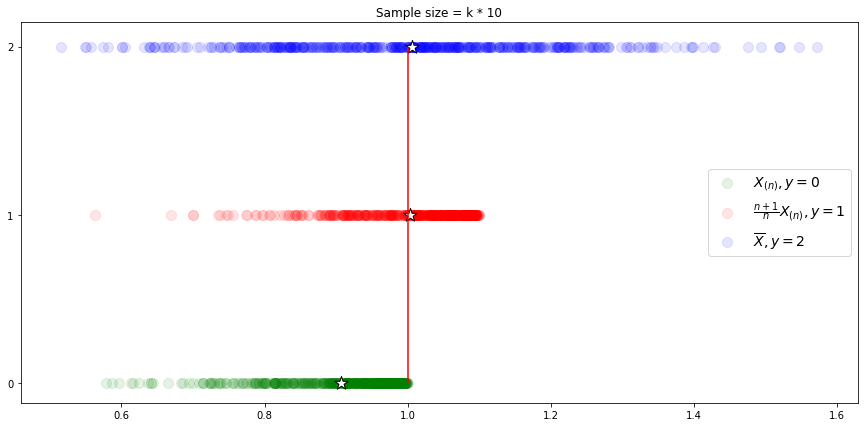

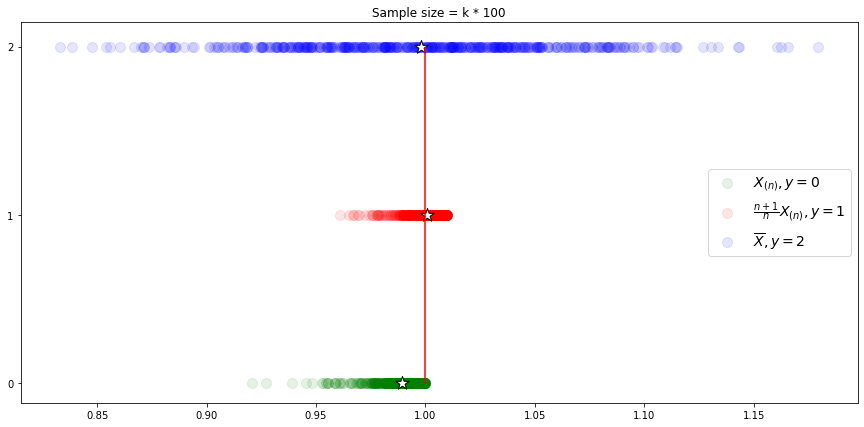

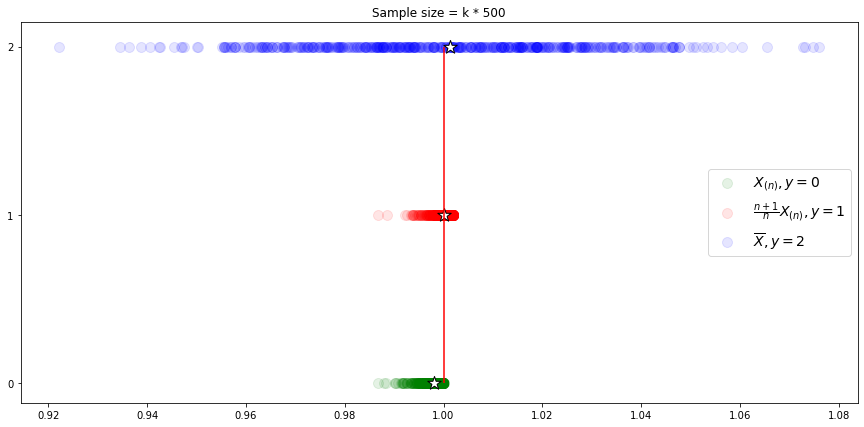

In [3]:
estim1 = lambda x: np.max(x, axis=1)
estim2 = lambda x: (x.shape[1] + 1)/x.shape[1] * np.max(x, axis=1)
estim3 = lambda x: 2 * np.mean(x, axis=1)
estimations = [estim1, estim2, estim3]
labels = [r'$X_{(n)}, y = 0$', r'$\frac{n+1}{n}X_{(n)}, y = 1$',
          r'$\overline{X}, y = 2$']
colors = ['green', 'red', 'blue']

calc_and_plot_estims(estimations, labels, colors, 'uniform')

**2.** Изучим поведение среднего оценок из первого пункта при росте размера $n$ выборки. Постройте график зависимости $\overline{\theta}$ от $n$ для трёх типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из п. 1.1 достаточно большого размера и посчитать оценки по префиксам, используя функции из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. Какие из оценок являются асимптотически несмещёнными (т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$)?

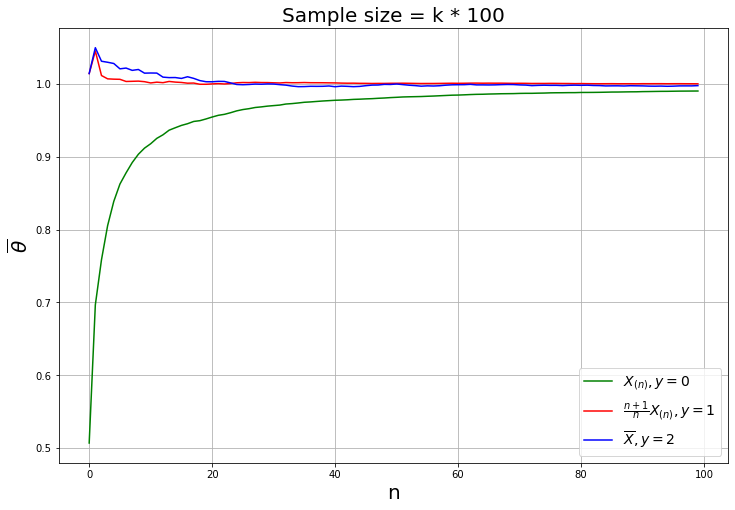

In [4]:
n = 100

samples = generate_samples(k, n)

# Считаем оценки "кумулятивно", 
# чтобы потом получить среднюю тету в зависимости от n
nums_n = np.arange(n)
estim1 = np.maximum.accumulate(samples, axis=1)
estim2 = np.maximum.accumulate(samples, axis=1) * (nums_n + 2) / (nums_n + 1)
estim3 = 2 * samples.cumsum(axis=1) / (nums_n + 1)

plt.figure(figsize=(15, 7))
estims = [estim1, estim2, estim3]
for i in range(3):
    # Усредняем по кол-ву наборов
    mean_estims = estims[i].mean(axis=0)
    
    plt.plot(mean_estims, color=colors[i], label=labels[i])
    
plt.xlabel('n', fontsize=20)
plt.ylabel(r'$\overline{\theta}$', fontsize=20)
plt.title('Sample size = k * %d' %n, fontsize=20)
plt.legend(fontsize=14)
plt.grid(True);

**Ответ:** Судя по графику, все $3$ оценки являются асимтотически несмещёнными.

**3.** Пусть теперь $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$. Какие из этих оценок являются несмещенными?

*Напоминание:* $S^2 = \frac{1}{n} \sum\limits_{i = 1}^{n} (X_i - \overline{X})^2 = \overline{X^2} - \overline{X}^2$

**Ответ:** пользуясь ответами к $4$-й задаче второго теор. задания, имеем: $S^2$ является смещённой оценкой, $\frac{n}{n-1}S^2$ является несмещённой.

Для данной модели повторите действия из первых двух частей.

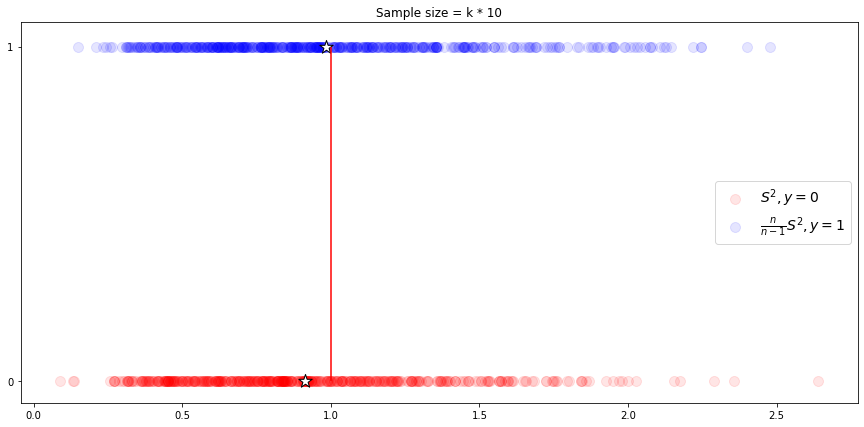

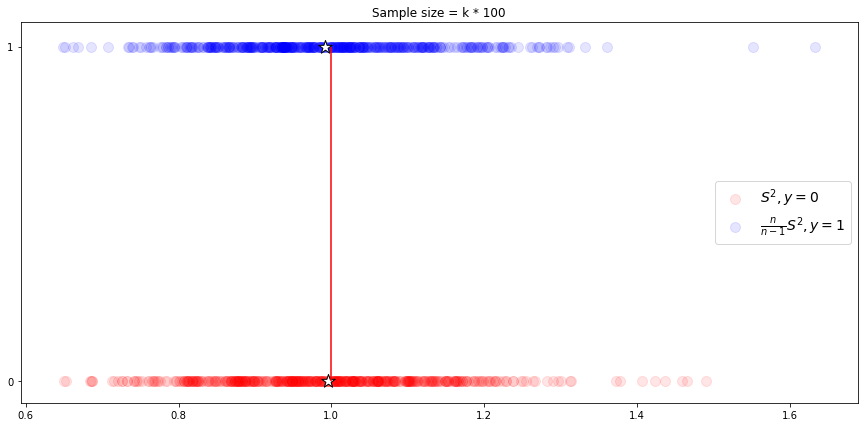

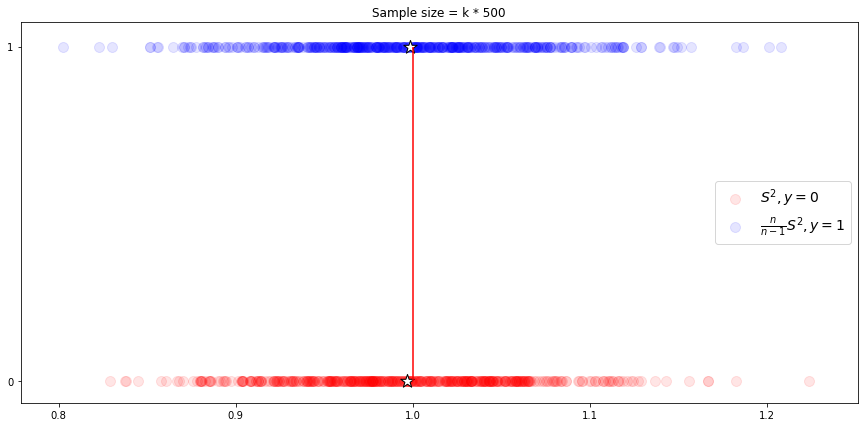

In [4]:
estim1 = lambda x: (x**2).mean(axis=1) - (x.mean(axis=1))**2
estim2 = lambda x: x.shape[1] / (x.shape[1] - 1) * estim1(x)

estimations = [estim1, estim2]
labels = [r'$S^2, y = 0$', r'$\frac{n}{n-1}S^2, y = 1$']
colors = ['red', 'blue']

# Для random
calc_and_plot_estims(estimations, labels, colors, 'normal')

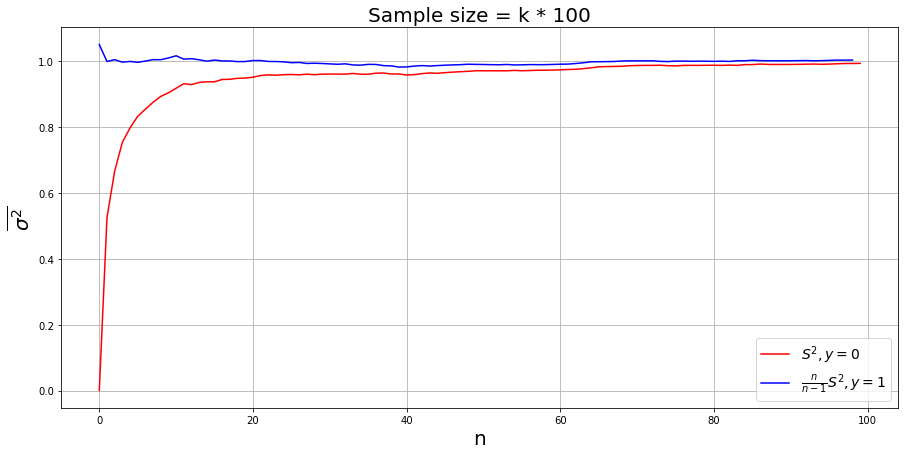

In [5]:
n = 100
k = 500

samples = generate_samples(k, n, r_type='normal')

# Считаем оценки "кумулятивно", 
# чтобы потом получить среднюю тету в зависимости от n
nums_n = np.arange(n)
estim1 = (samples**2).cumsum(axis=1) / (nums_n + 1) \
          - (samples.cumsum(axis=1) / (nums_n + 1))**2
estim2 = estim1[:, 1:] * (nums_n[1:] + 1) / nums_n[1:] # Специально сдвинул индкексы
                                                        # на один вперёд, чтобы не было деления на 0

plt.figure(figsize=(15, 7))
estims = [estim1, estim2]
for i in range(2):
    # Усредняем по кол-ву наборов
    mean_estims = estims[i].mean(axis=0)
    
    plt.plot(mean_estims, color=colors[i], label=labels[i])
    
plt.xlabel('n', fontsize=20)
plt.ylabel(r'$\overline{\sigma^2}$', fontsize=20)
plt.title('Sample size = k * %d' %n, fontsize=20)
plt.legend(fontsize=14)
plt.grid(True);

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты свойство несмещенности данных оценок? Поясните с точки зрения статистики, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** 1) свойство несмещённости --- свойство оценки сохранять МО равным $\theta$. На практике же это выглядит как колебание МО оценки вблизи $\theta$.

2) Да, подтверждают. На графиках видно, как несмещённые оценки уже при небольших $n$ очень близки к $\theta$, а вот смещённые относительно медленно подходят к $\theta$ с ростом $n$. Более того, если бы в задании примеры не были такими, что $\lim_{n\rightarrow\infty}\frac{n\pm c}{n} = 1$ (т. е. оценки асимптотически несмещённые), то в общем случае смещённые оценки могли бы идти вообще мимо.

3) Как мы показывали в $4$-й задаче второго теор. задания, $\frac{n}{n-1}S^2$ является несмещённой оценкой дисперсии. Тогда $\frac{n}{n-1}\cdot\frac{f(X)}{n} = \frac{f(X)}{n-1}$, поэтому при подсчёте в лабораторных по физике используют $n-1$ в знаменателе. Но если $n$ велико, то с большой точностью можно всегда писать $n$ в знаменателе.

---
## Задача 2.

Пусть $X_1, \ldots, X_n$ -- выборка из распределения $Exp(\theta)$. Визуализируйте свойства состоятельности и асимптотической нормальности для оценки максимального правдоподобия параметра $\theta$. 

Примеры кода можно брать из курса Введение в АД.

**Решение:**

Для определённости рассмотрим $\theta = 1$. Тогда для состоятельности нужно визуализировать $\forall \varepsilon > 0\  P\left(\left|\frac{n}{\sum_{i=1}^n X_i} - 1\right| > \varepsilon\right)\rightarrow 0$ при $n\rightarrow+\infty$, а для асимптотической нормальности --- asimpt_diff = $\sqrt{n}\left(\frac{n}{\sum_{i=1}^n X_i} - 1\right)$ сходится по распределению к нормальному распределению $N(0, 1)$.

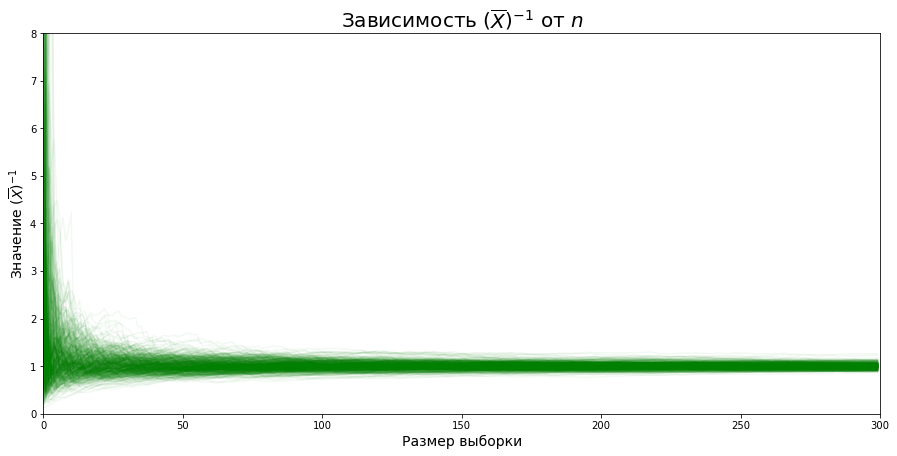

In [19]:
# С лекций/семинаров мы знаем, что для Exp(\theta) ОМП = 1 / \overline{X}
sample_size = 300
samples_count = 500
samples = sps.expon.rvs(size=(samples_count, sample_size))

MLE = (np.arange(sample_size) + 1) / samples.cumsum(axis=1)

plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(MLE[i], color='green', alpha=0.05)
    plt.xlabel('Размер выборки', fontsize=14)
    plt.ylabel(r'Значение $\left(\overline{X}\right)^{-1}$', fontsize=14)
    plt.xlim((0, sample_size))
    plt.ylim((0, 8))
    plt.title(r'Зависимость $\left(\overline{X}\right)^{-1}$ от $n$', fontsize=20);

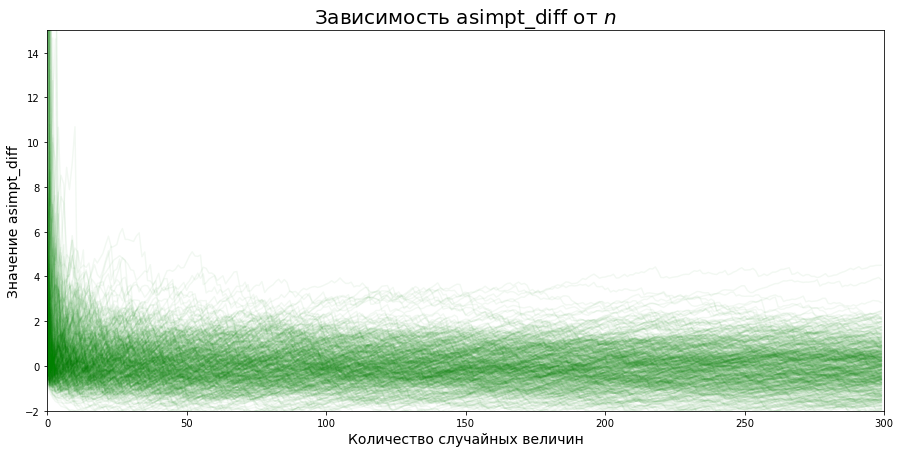

In [20]:
# Для мат. ожидания и дисперсии берём теоретические значения: 1 и 1
asimpt_diff = (MLE - 1) * (np.arange(sample_size) + 1)**0.5

plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(asimpt_diff[i], color='green', alpha=0.05)
    # print(asimpt_diff[i].max())
    plt.xlabel('Количество случайных величин', fontsize=14)
    plt.ylabel(r'Значение asimpt_diff', fontsize=14)
    plt.xlim((0, sample_size))
    plt.ylim((-2, 15))
    plt.title(r'Зависимость asimpt_diff от $n$', fontsize=20);

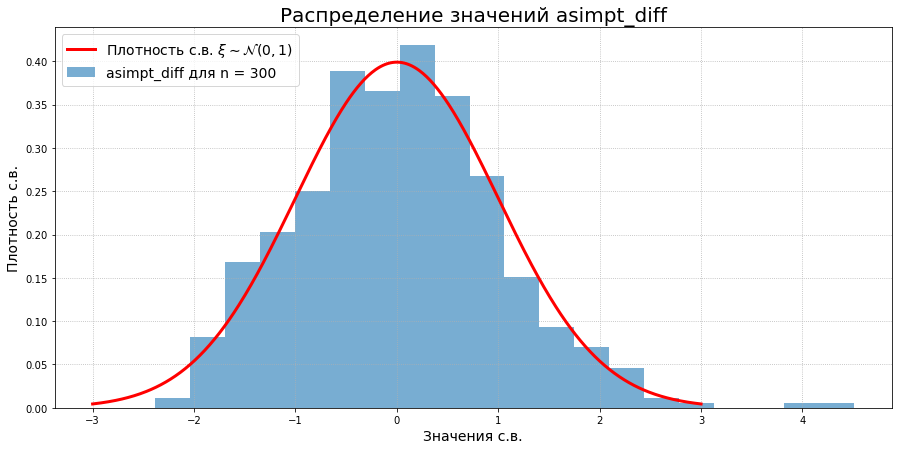

In [21]:
grid = np.linspace(-3, 3, 500)
plt.figure(figsize=(15, 7))

plt.hist(
    asimpt_diff.T[sample_size - 1],
    bins=20,
    density=True,
    alpha=0.6,
    label='asimpt_diff для n = 300'
)

# рисуем график плотности
plt.plot(
    grid,
    sps.norm.pdf(grid),
    color='r',
    linewidth=3,
    label=r'Плотность с.в. $\xi\sim\mathcal{N}(0, 1)$',
)
plt.xlabel('Значения с.в.', fontsize=14)
plt.ylabel('Плотность с.в.', fontsize=14)
plt.legend(loc="upper left",  fontsize=14)
plt.grid(ls=':')
plt.title('Распределение значений asimpt_diff',  fontsize=20)
plt.show()

**Вывод:** 1) На первом графике действительно видно, как значения оценки с ростом $n$ становятся всё ближе к $1$. Это как раз и отражает состоятельность.

2) Видно, что значения оценки постепенно зажимаются во всё более узкую трубу, границы которой оценка пересекает лишь конечное число раз. Но сами значения внутри трубки гуляют произвольно, пересекая сколько угодно близкую изнутри к границе линию большое число раз. Это отражает свойство асимптотической нормальности.

-----

## Задача 3.
Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Из домашнего задания известно, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$.  Вам нужно убедиться в этом, сгенерировав множество выборок, посчитав по каждой из них оценку $X_{(n)}$ параметра $\theta$ в зависимости от размера выборки и визуализировав рассматриваемое свойство.

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br>
По каждой из них посчитайте оценки  $\widehat{\theta}_{jn} = \max(X^j_1, \dots, X^j_n)$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $T_{jn} = n \left( \theta - \widehat{\theta}_{jn} \right)$, где $\theta = 1$.

In [25]:
sample_size = 500
samples_count = 300
samples = sps.uniform.rvs(size=(samples_count, sample_size))

theta_jn = np.maximum.accumulate(samples, axis=1)
T_jn = (np.arange(sample_size) + 1) * (1 - theta_jn)

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Все кривые должны быть нарисованы *одним и тем же цветом* с прозрачностью `alpha=0.2`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

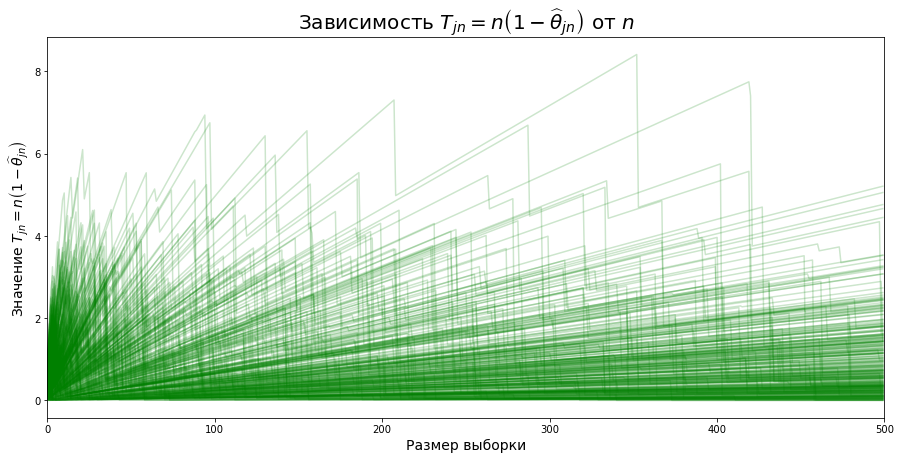

In [26]:
plt.figure(figsize=(15, 7))
for j in range(samples_count):
    plt.plot(T_jn[j], color='green', alpha=0.2)
    plt.xlabel('Размер выборки', fontsize=14)
    plt.ylabel(
        r'Значение $T_{jn} = n\left(1 - \widehat{\theta}_{jn}\right)$',
        fontsize=14
    )
    plt.xlim((0, sample_size))
    # plt.ylim((0, 8))
    plt.title(
        r'Зависимость $T_{jn} = n\left(1 - \widehat{\theta}_{jn} \right)$ от $n$',
        fontsize=20
    );

**Ответ:** по графику видно, что значения не сходятся к какой-либо константе.

Для $n=500$ по выборке $T_{1,500}, ..., T_{300,500}$ постройте гистограмму и график плотности распределения $Exp(1)$.  Не забудьте сделать легенду.

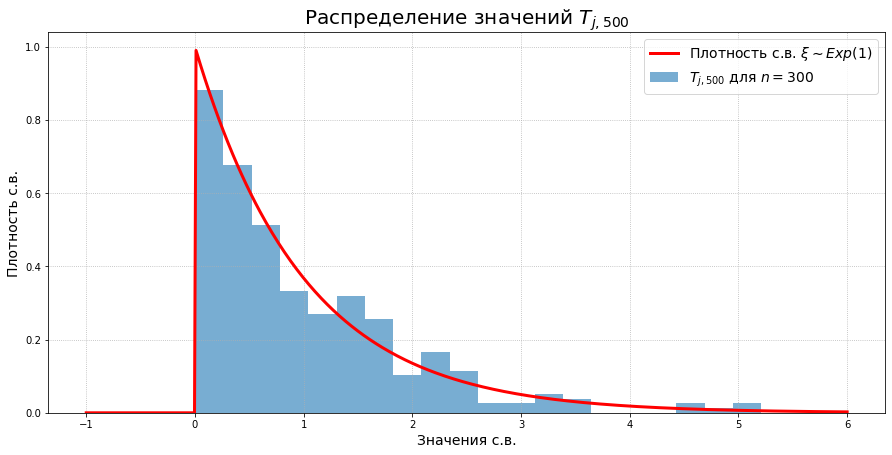

In [27]:
grid = np.linspace(-1, 6, 500)
plt.figure(figsize=(15, 7))

plt.hist(
    T_jn.T[sample_size - 1],
    bins=20,
    density=True,
    alpha=0.6,
    label=r'$T_{j,500}$ для $n = 300$'
)

# рисуем график плотности
plt.plot(
    grid,
    sps.expon.pdf(grid),
    color='r',
    linewidth=3,
    label=r'Плотность с.в. $\xi\sim Exp(1)$',
)
plt.xlabel('Значения с.в.', fontsize=14)
plt.ylabel('Плотность с.в.', fontsize=14)
plt.legend(loc='best',  fontsize=14)
plt.grid(ls=':')
plt.title(r'Распределение значений $T_{j,500}$',  fontsize=20)
plt.show()

Хорошо ли гистограмма приближает плотность распределения $Exp(1)$? Подтверждают ли проведенные эксперименты свойство $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$? Что можно сказать в сравнении с выборочным средним?

**Вывод:** 1) Если брать за критерий "хорошести" приближения число столбиков, сильно отклоняющихся от распределения, то да, гистограмма хорошо приближает плотность.

2) Как видно из гистограммы, проведённые эксперименты потверждают это свойство.

3) $\overline{X}$ --- несмещённая, асимптотически нормальная оценка $\frac{1}{\theta}$, т. е. $\sqrt{n}(\overline{X} - \theta)$ сходится по распределению к нормальному, а $n(\theta - X_{(n)})$ --- к экспоненциальному распределению. Видно, что в первом случае скорость сходимости имеет порядок $\frac{1}{\sqrt{n}}$, а во втором --- $\frac{1}{n}$, т. е. в квадрат раз быстрее.

-----

## Задача 4.
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [28]:
def draw_likelihood(density_function, grid, samples, label):
    """Изображает график функции правдоподобия для каждой из 3 выборок.
    
    Аргументы:
        density_function --- функция, считающая плотность 
            (обычную или дискретную). На вход данная функция 
            должна принимать массив размера (1, len_sample)
            и возвращать массив размера (len_grid, len_sample).
        grid --- массив размера (len_grid, 1), являющийся 
                 сеткой для построения графика;
        samples --- три выборки;
        label --- latex-код параметрической модели.
    """
    
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = np.prod(density_function(sample), axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

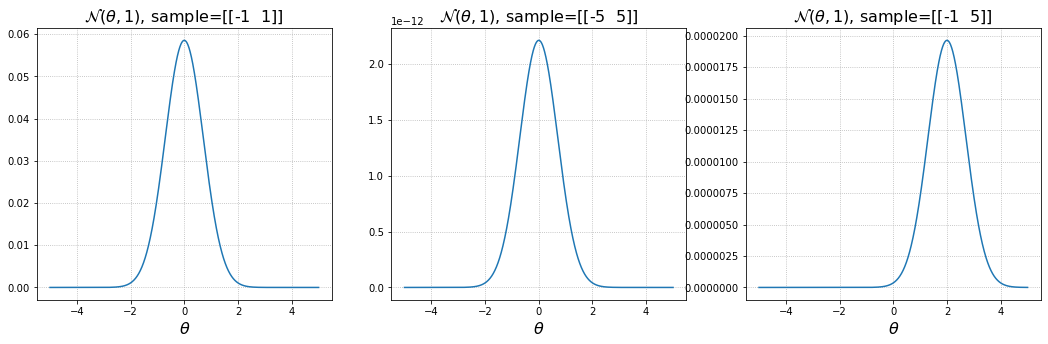

In [29]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

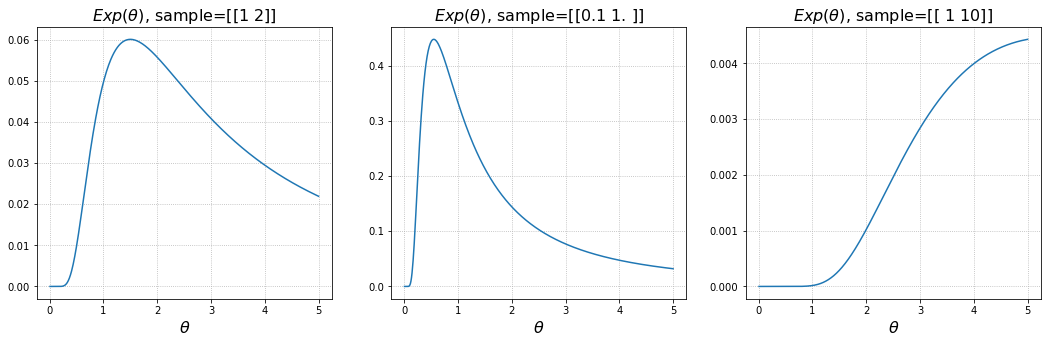

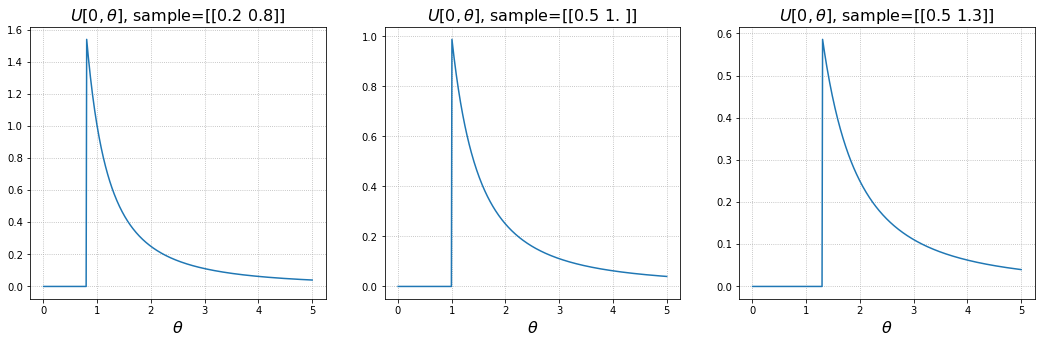

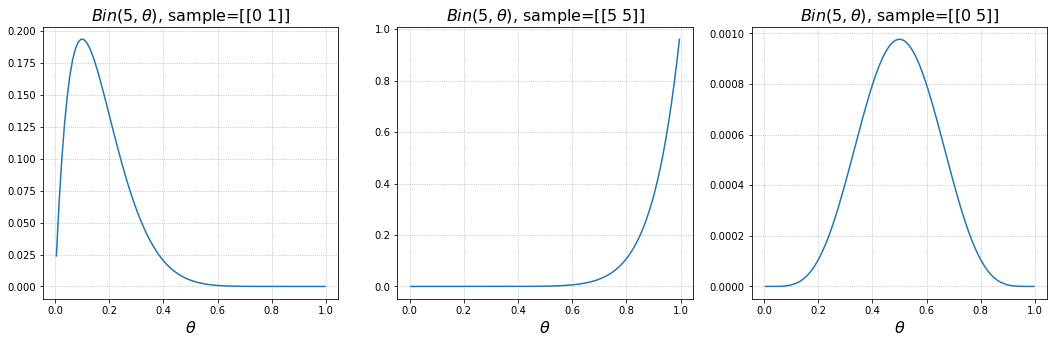

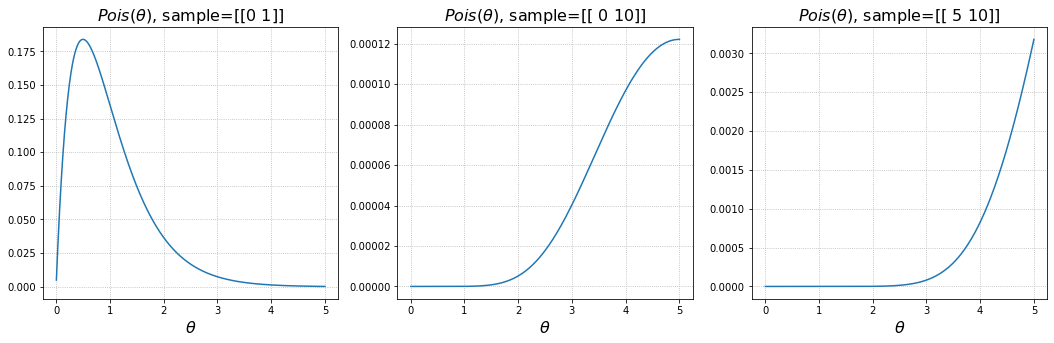

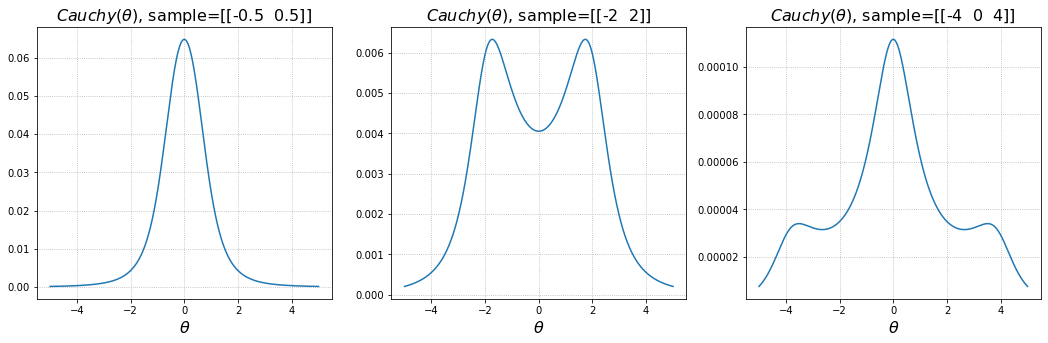

In [30]:
# Тут меняем не loc, а scale, потому что в наших обозначениях
# p_{\theta}(x) = \theta e^{-\theta x}
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(scale=grid).pdf, grid, 
                [[1, 2], [0.1, 1], [1, 10]], r'$Exp(\theta)$')

# Тут тоже scale, потому что в обозначениях scipy.stats
# точки будут из [loc, loc + scale]
draw_likelihood(sps.uniform(scale=grid).pdf, grid, 
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], r'$U[0, \theta]$')

# n = 5, p = \theta
draw_likelihood(sps.binom(n=5, p=grid).pmf, grid, 
                [[0, 1], [5, 5], [0, 5]], r'$Bin(5, \theta)$')

# mu = \theta
draw_likelihood(sps.poisson(mu=grid).pmf, grid, 
                [[0, 1], [0, 10], [5, 10]], r'$Pois(\theta)$')

# По условию сказано, что играет роль \theta сдвига
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, 
                [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], r'$Cauchy(\theta)$')

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:** 1) Для нормального распределения: достигает максимум в выборочном среднем, как и должна; для экспоненциального и пуассоновского: аналогично; для равномерного: достигает максимум в $X_{(n)}$, как и должна; для биномиального: достигает максимум в $\overline{X} / 5$, что также согласуется с теорией; для Коши для первых двух: если $|X_1 - X_2| < 2$, то максимум в $\overline{X}$, иначе в $\frac{1}{2}\left(X_1 + X_2 \mp \sqrt{(X_1 - X_2)^2 - 4}\right)$, как и должна (для третьего аналитическое выражение достаточно грустно считать).

2) Как видно из графиков, в общем случае не является. В случае нормально распределения очень похожа на плотность, потому что вид функции в зависимости от $\theta$ не меняется (как она стояла в квадратах разности в экспоненте, так и стоит), но в остальных --- нет, потому что при произведении вылезают бОльшие/меньшие степени $\theta$ и вид зависимости от неё меняется.

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [31]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**

Всегда будет получаться $0$, потому что перемножается очень много чисел меньших $1$. Обходится это путём подсчёта логарифмической функции правдоподобия вместо обычной. Для этого в ```scipy.stats.rv_continuos``` есть функция ```nnlf(self, theta, x)```, которая есть "```-sum(log pdf(x, theta), axis=0)``` where theta are the parameters (including loc and scale)". Тогда саму функцию правдоподобия можно записать в виде $\mathcal{L}_X(\theta) = e^{-nnlf(\theta, X)}$.

In [32]:
log_likelihood = sps.norm.nnlf((5, 1), sample)
print('likelihood = exp(-%lf)' %log_likelihood)

likelihood = exp(-1392867.494034)


-----

## Задача 5.
*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом $0.01$ сгенерируйте $5000$ независимых выборок $X^1=\left(X^1_1, \dots, X^1_{100} \right), \dots, X^{5000} = \left(X^{5000}_1, \dots, X^{5000}_{100} \right)$ из распределения $U[0, \theta]$.

Рассмотрим одну из перечисленных выше оценок $\widehat{\theta}$. Посчитайте ее значение по каждой выборке. Тем самым, для данного $\theta$ получится $5000$ реализаций этой оценки $\widehat{\theta}_1, ..., \widehat{\theta}_{5000}$, где значение $\widehat{\theta}_j$ посчитано по реализации выборки $X^j$.

Теперь можно оценить функцию риска этой оценки с помощью усреднения
$$\widehat{R}_{\widehat{\theta}}(\theta) = \frac{1}{5000}\sum\limits_{j=1}^{5000} L\left(\widehat{\theta}_j, \theta\right),$$
где $L$ — одна из двух функций потерь: квадратичная $L(x, y)=(x-y)^2$ и линейная $L(x, y)=\left|x-y\right|$.

Для каждого из типов функций потерь постройте свой график. Нанесите на этот график для каждой из четырех оценок $\widehat{\theta}$ оценку функции потерь $\widehat{R}_{\widehat{\theta}}(\theta)$, пользуясь шаблоном ниже. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

*Совет*: при тестировании кода запускайте его с небольшими размерами данных. Например, используйте 100 реализаций выборок. Финальные результаты получите, поставив требуемые значения размеров данных.

В задаче доспустимо использовать короткие циклы, то есть с малым количествои итераций.

**Решение:**

In [5]:
# Ядро умирает при n = 4000, поэтому ограничимся n = 3000
n = 3000
sample_size = 100
grid, step = np.linspace(0, 2, 200, endpoint=False, retstep=True)
grid += step # Сдвинули, так как \theta > 0

# Мы хотим получить после генерации трёхмерный массив,
# в котром 0-я ось отвечает за разные \theta, 1-я --- за множества выборок,
# 2-я --- за реализацию выборки. Если сделать размер grid-а (200, 1, 1), то
# broadcasting сработает корректно, и на выходе мы получим shape=(200, 5000, 100)
samples = sps.uniform.rvs(
    scale=grid.reshape(-1, 1, 1),
    size=(200, n, sample_size)
)

In [6]:
# Считаем оценки
estim1 = 2 * samples.mean(axis=2)
estim2 = samples.min(axis=2) * (sample_size + 1)
estim3 = samples.min(axis=2) + samples.max(axis=2)
estim4 = samples.max(axis=2) * (sample_size + 1) / sample_size

estimations = [estim1, estim2, estim3, estim4]
labels = [r'$2\overline{X}$', r'$(n+1)X_{(1)}$',
          r'$X_{(1)}+X_{(n)}$', r'$\frac{n+1}{n} X_{(n)}$']

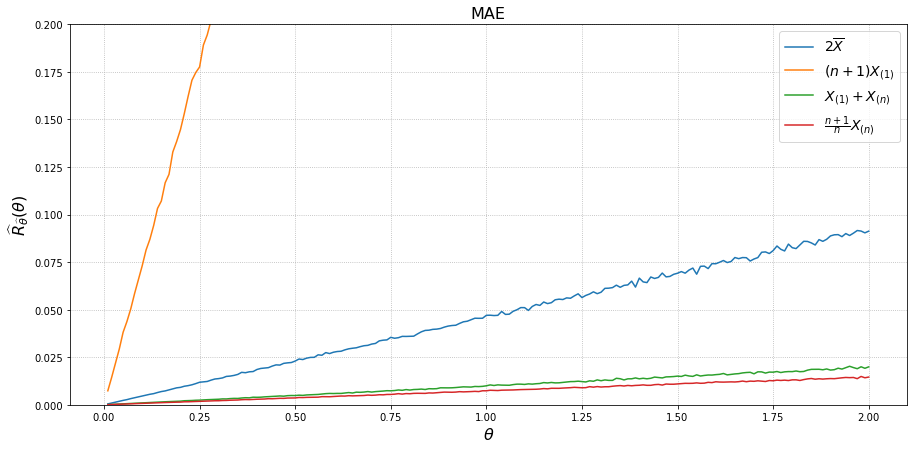

In [7]:
plt.figure(figsize=(15, 7))

for estimation, label in zip(estimations, labels):
    # Считаем функцию риска и рисуем её
    MAE = np.abs(estimation - grid.reshape(-1, 1)).mean(axis=1)
    plt.plot(grid, MAE, label=label)

plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta)$', fontsize=16)
plt.legend(fontsize=14)
plt.title('MAE', fontsize=16)
plt.ylim((0, 0.2));

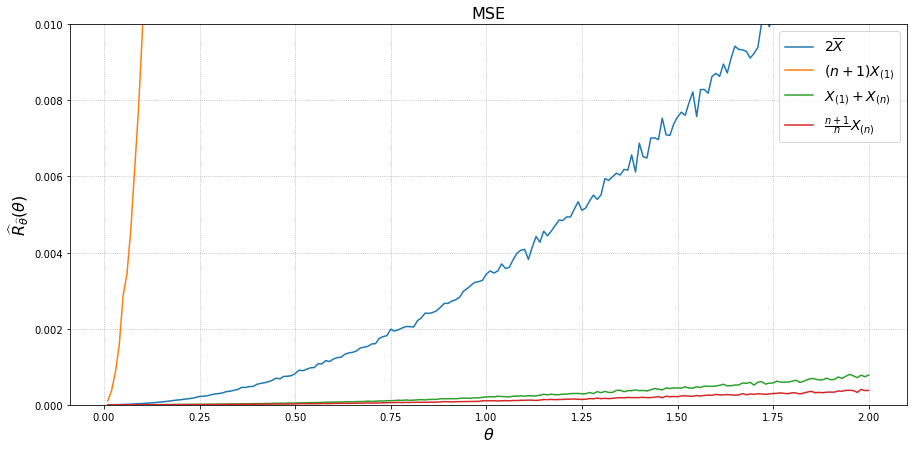

In [8]:
plt.figure(figsize=(15, 7))

for estimation, label in zip(estimations, labels):
    # Считаем функцию риска и рисуем её
    MSE = ((estimation - grid.reshape(-1, 1))**2).mean(axis=1)
    plt.plot(grid, MSE, label=label)

plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta)$', fontsize=16)
plt.legend(fontsize=14)
plt.title('MSE', fontsize=16)
plt.ylim((0, 0.01));

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:** в равномерном подходе с обеими функциями потерь наилучшей оценкой является $\frac{n+1}{n}X_{(n)}$.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Exp(\theta)$. Рассмотрим оценки $\widehat{\theta}_k = 
\sqrt[k]{k! \left/ \overline{X^k} \right.}$ для $1 \leqslant k \leqslant 5$, которые вы получили в домашнем задании. Проведите исследование, аналогичное пункту *a)*. Используйте цикл по $k$, чтобы не дублировать код. Функция факториала реализована как  `scipy.special.factorial`.

**Решение:**

In [2]:
# Ядро умирает при n = 4000, поэтому ограничимся n = 3000
n = 3000
sample_size = 100
grid, step = np.linspace(0, 2, 200, endpoint=False, retstep=True)
grid += step # Сдвинули, так как \theta > 0

# Мы хотим получить после генерации трёхмерный массив,
# в котром 0-я ось отвечает за разные \theta, 1-я --- за множества выборок,
# 2-я --- за реализацию выборки. Если сделать размер grid-а (200, 1, 1), то
# broadcasting сработает корректно, и на выходе мы получим shape=(200, 5000, 100)
samples = sps.expon.rvs(
    scale=grid.reshape(-1, 1, 1),
    size=(200, n, sample_size)
)

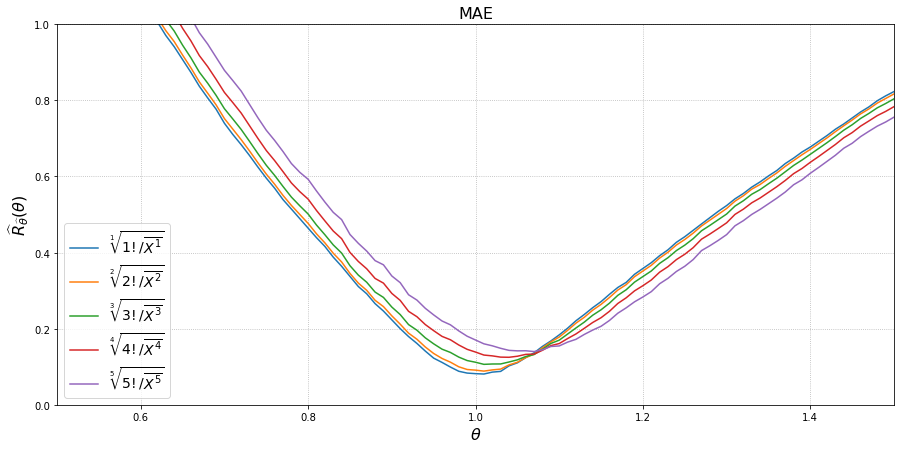

In [3]:
from scipy.special import factorial

MSE = [] # Чтобы не считать дважды оценки, сразу будем добавлять в этот список
# значения MSE, а потом отрисовывать на отдельном графике
plt.figure(figsize=(15, 7))
label = r'$\sqrt[{0}]{{ {1}! / \overline{{ X^{{ {2} }} }} }}$'

for k in range(1, 6):
    # Считаем оценку
    estim = (factorial(k) / (samples**k).mean(axis=2)) ** (1/k)
    # Считаем функцию риска и рисуем её
    MAE = np.abs(estim - grid.reshape(-1, 1)).mean(axis=1)
    MSE.append(((estim - grid.reshape(-1, 1))**2).mean(axis=1))
    plt.plot(grid, MAE, label=label.format(k, k, k))

plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta)$', fontsize=16)
plt.legend(fontsize=14)
plt.title('MAE', fontsize=16)
plt.xlim((0.5, 1.5))
plt.ylim((0, 1));

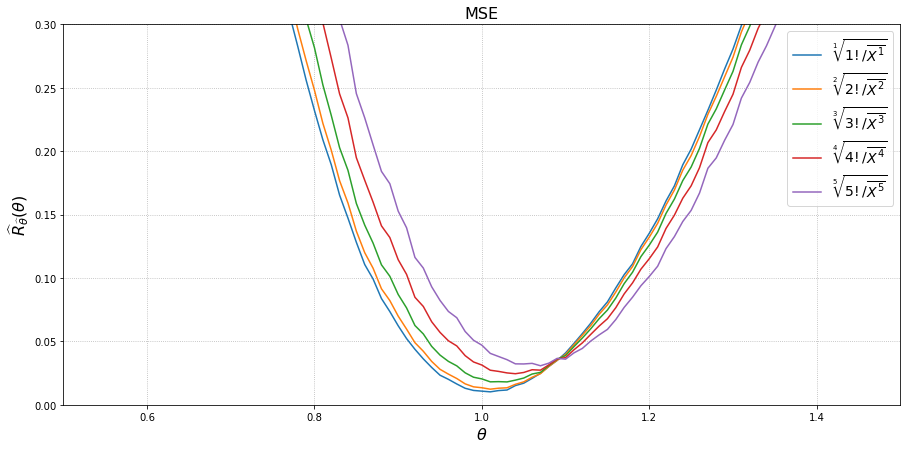

In [4]:
plt.figure(figsize=(15, 7))

for k in range(1, 6):
    MSE.append(((estim - grid.reshape(-1, 1))**2).mean(axis=1))
    plt.plot(grid, MSE[k - 1], label=label.format(k, k, k))

plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta)$', fontsize=16)
plt.legend(fontsize=14)
plt.title('MSE', fontsize=16)
plt.xlim((0.5, 1.5))
plt.ylim((0, 0.3));

**Вывод:** Так как все функции риска оценок пересекаются, они несравнимы в равномерном подходе. А если сравнивать, например, в минимаксном подходе, то оценка $1 / \overline{X}$ является наилучшей при обеих функциях потерь.

-----

## Задача 6.
Пусть $\widehat{\theta}$ &mdash; оценка параметра $\theta$ и $MSE_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \left(\widehat{\theta} - \theta\right)^2$ &mdash; среднеквадратичная ошибка оценки $\widehat{\theta}$. Тогда справедливо bias-variance разложение:
$$MSE_{\widehat{\theta}} (\theta) = \textrm{bias}_{\widehat{\theta}}^2(\theta) + \textrm{var}_{\widehat{\theta}} (\theta); \\
\begin{align*}
\textrm{bias}_{\widehat{\theta}} (\theta) & = \mathsf{E}_{\theta} \widehat{\theta} - \theta; \\
\textrm{var}_{\widehat{\theta}} (\theta) & = \mathsf{D}_{\theta} \widehat{\theta}.
\end{align*}$$

*a).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathcal{K} = \left\{cX_{(n)}, c\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** $$
\begin{align*}
\textrm{bias}^2_{\widehat{\theta}}(\theta) &= \left(c\mathsf{E}_{\theta}X_{(n)} - \theta\right)^2 = \left(c\frac{n}{n+1} - 1\right)^2\cdot\theta^2, \\
\textrm{var}_{\widehat{\theta}}(\theta) &= c^2\mathsf{D}_{X_{(n)}} = \frac{c^2 n}{(n+1)^2(n+2)}\cdot\theta^2.
\end{align*}
$$

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отображена информативная часть графика (по оси *x* примерно от `0.9` до `1.4`). Не забудьте добавить сетку и легенду, а также подписать оси.

На графике проведите вертикальные линии с координатами $c$, соответствующими минимуму функции риска, несмещенной оценке и ОМП.

Сделайте выводы. Какое $c$ дает минимум функции риска? Каково поведение компонент разложения? Как соотносятся полученные оценки?

**Решение:**

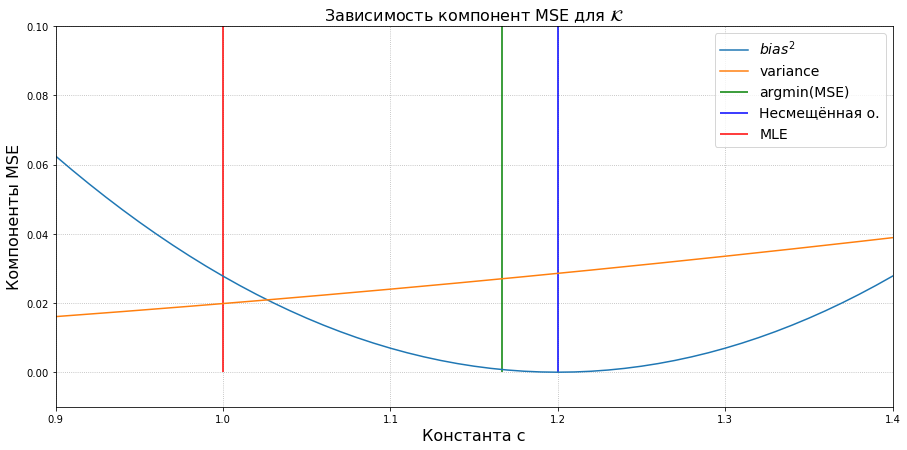

In [33]:
n = 5
grid = np.linspace(0, 2, 200, endpoint=False) # Сетка значений константы с

bias_squared = (grid * n / (n + 1) - 1)**2
var = grid**2 * n / (n + 1)**2 / (n + 2)

plt.figure(figsize=(15, 7))

plt.plot(grid, bias_squared, label=r'$bias^2$')
plt.plot(grid, var, label='variance')

# Если продифференцировать MSE по c и приравнять к 0, то найдём c = (n+2)/(n+1) = 7/6
plt.vlines(7/6, 0, 0.1, label='argmin(MSE)', color='green')
# Для нахождения несмещённой оценки нужно занулить bias => c = (n+1)/n = 6/5
plt.vlines(6/5, 0, 0.1, label='Несмещённая о.', color='blue')
# Для такого распределения ОМП  равна X_{(n)} => c = 1
plt.vlines(1, 0, 0.1, label='MLE', color='red')


plt.grid(ls=':')
plt.xlabel('Константа c', fontsize=16)
plt.ylabel('Компоненты MSE', fontsize=16)
plt.legend(fontsize=14)
plt.title(r'Зависимость компонент MSE для $\mathcal{K}$', fontsize=16)
plt.xlim((0.9, 1.4))
plt.ylim((-0.01, 0.1));

**Вывод:** 1) Если продифференцировать MSE по $c$ и приравнять к $0$, то, решив уравнение, найдём $c =\frac{(n+1)(n+2)}{n(n+2) + 1} = \frac{n+2}{n+1} = \frac{7}{6}$.

2) Дисперсия очень медленно растёт, поэтому основной вес будет иметь минимум отклонения. Так что неудивительно, что $c$ для несмещённой оценки так близко к $\textrm{argmin}(\textrm{MSE})$.

3) Хоть значение $c$ для несмещённой оценки и близко к $\textrm{argmin}(\textrm{MSE})$, но всё же это не оно: относительная разница составляет $\left(\frac{6}{5} - \frac{7}{6}\right) \frac{6}{7} \approx 3\%$. ОМП же расположилась сильно дальше от $\textrm{argmin}(\textrm{MSE})$: относительная разница равна $\left(\frac{7}{6} - 1\right) \frac{6}{7} \approx 14\%$.

*b).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$, где $a$ и $\sigma$ неизвестны. Для величины $\sigma^2$ рассмотрим класс оценок $\mathcal{K} = \left\{\frac{1}{c}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, \; c\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** $$
\begin{align*}
\textrm{bias}^2_{\widehat{\theta}}(\theta) &= \left(\frac{n}{c}\mathsf{E}_{\theta}S^2 - \sigma^2\right)^2 = \left(\frac{n}{c}\frac{n-1}{n} - 1\right)^2\sigma^4 = \left(\frac{n-1}{c} - 1\right)^2\sigma^4, \\
\textrm{var}_{\widehat{\theta}}(\theta) &= \frac{1}{c^2}\mathsf{D}_{\theta}n S^2 = \frac{2(n-1)\sigma^4}{c^2}.
\end{align*}
$$

Повторите исследование, аналогичное пункту *a)* для $a = 0, \sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика рядом с помощью функции `plt.subplot`. Не забудьте сделать выводы.

**Решение:**

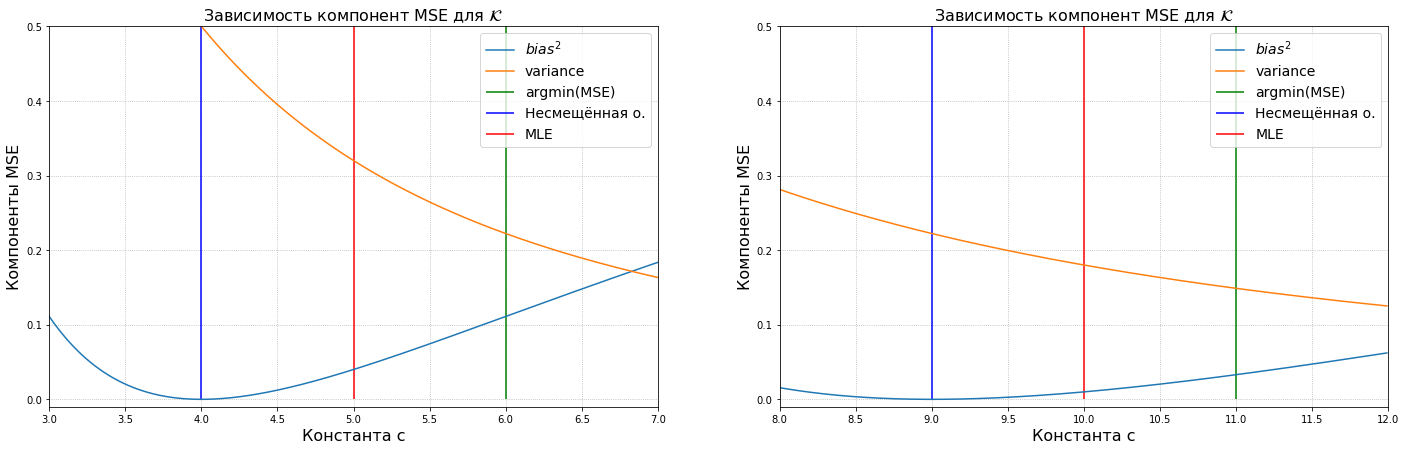

In [34]:
grid = np.linspace(3, 12, 900, endpoint=False) # Сетка значений константы с
plt.figure(figsize=(24, 7))

for i, n in enumerate([5, 10]):
    plt.subplot(1, 2, i + 1)
    bias_squared = ((n - 1) / grid - 1)**2
    var = 2*(n - 1) / grid**2
    
    plt.plot(grid, bias_squared, label=r'$bias^2$')
    plt.plot(grid, var, label='variance')
    # Если продифференцировать MSE по c и приравнять к 0, то найдём c = n+1 \in {6, 10}
    plt.vlines(n + 1, 0, 0.5, label='argmin(MSE)', color='green')
    # Для нахождения несмещённой оценки нужно занулить bias => c = n-1 \in {4, 9}
    plt.vlines(n - 1, 0, 0.5, label='Несмещённая о.', color='blue')
    # Для такого распределения ОМП  равна S^2 => c = n \in {5, 10}
    plt.vlines(n, 0, 0.5, label='MLE', color='red')


    plt.grid(ls=':')
    plt.xlabel('Константа c', fontsize=16)
    plt.ylabel('Компоненты MSE', fontsize=16)
    plt.legend(fontsize=14)
    plt.title(r'Зависимость компонент MSE для $\mathcal{K}$', fontsize=16);
    plt.xlim((n - 2, n + 2))
    plt.ylim((-0.01, 0.5));

**Вывод:** 1) Если продифференцировать MSE по $c$ и приравнять к $0$, то, решив уравнение, найдём $c = n + 1 \in \{6, 11\}$.

2) Так как $\textrm{variance}$ --- монотонно убывающая функция, то минимум не может лежать левее минимума $\textrm{bias}^2$, так что все оценки дают разумный результат. Какое-то время дисперсия убывает быстрее увеличения квадрата смещения, поэтому минимум располагается правее минимума квадрата смещения.

3) Оценки для $n = 5$ показывают плохие результаты: относительная разница для несмещённой оценки составляет $(6 - 4)\frac{1}{6} \approx 33.3\%$, ОМП же расположилась ближе: $(6 - 5)\frac{1}{6} \approx 16.6\%$. Для $n = 10$ относительное расположение оценок такое же, но относительная точность получше, потому что $n$ больше: $\frac{2}{11} \approx 18\%$ --- для несмещённой и $\frac{1}{11} \approx 9\%$ --- для ОМП.

*c).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $Exp (\theta)$. Рассмотрим класс оценок $\mathcal{K} = \left\{\frac{c}{X_1 + \dots + X_n}, \; c\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** $$
\begin{align*}
\textrm{bias}^2_{\widehat{\theta}}(\theta) &= \left(с\mathsf{E}_{\theta}\left(\overline{X}\right)^{-1} - \theta\right)^2 = \left(\frac{c\theta}{n-1} - \theta\right)^2 = \left(\frac{c}{n-1} - 1\right)^2\theta^2,\\
\textrm{var}_{\widehat{\theta}}(\theta) &= c^2\mathsf{D}_{\theta}\left(\overline{X}\right)^{-1} = \frac{c^2 \theta^2}{(n-1)^2(n-2)}.
\end{align*}
$$

Повторите исследование, аналогичное пункту *c)* для $\theta = 1$ и $n = 7$. Не забудьте сделать выводы.

**Решение:**

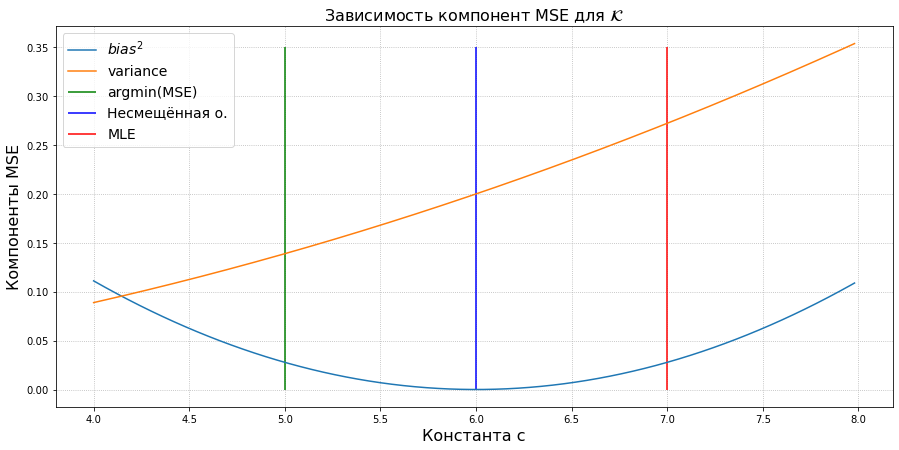

In [35]:
n = 7
grid = np.linspace(4, 8, 200, endpoint=False) # Сетка значений константы с

bias_squared = (grid / (n - 1) - 1)**2
var = grid**2 / (n - 1)**2 / (n - 2)

plt.figure(figsize=(15, 7))

plt.plot(grid, bias_squared, label=r'$bias^2$')
plt.plot(grid, var, label='variance')
# Если продифференцировать MSE по c и приравнять к 0, то найдём c = n-2 = 5
plt.vlines(5, 0, 0.35, label='argmin(MSE)', color='green')
# Для нахождения несмещённой оценки нужно занулить bias => c = n-1 = 6
plt.vlines(6, 0, 0.35, label='Несмещённая о.', color='blue')
# Для такого распределения ОМП  равна 1 / \overline{X} => c = n = 7
plt.vlines(7, 0, 0.35, label='MLE', color='red')


plt.grid(ls=':')
plt.xlabel('Константа c', fontsize=16)
plt.ylabel('Компоненты MSE', fontsize=16)
plt.legend(fontsize=14)
plt.title(r'Зависимость компонент MSE для $\mathcal{K}$', fontsize=16);

**Вывод:** 1) Если продифференцировать MSE по $c$ и приравнять к $0$, то, решив уравнение, найдём $c = n - 2 = 5$.

2) Вблизи минимума смещения дисперсия растёт сравнимо с убыванием смещения, поэтому произошёл значительный сдвиг влево от минимума смещения.

3) Оценки показывают плохие результаты: относительная разница для несмещённой оценки составляет $(6 - 5)\frac{1}{5} = 20\%$, ОМП же расположилась ещё дальше: $(7 - 5)\frac{1}{5} = 40\%$.

Сделайте вывод по результатам пунктов *a)*, *b)*, *c)*.

**Общий вывод:** бывает, что несмещённая оценка даёт оценку точнее, чем ОМП как в пунктах *a)*, *c)*, а бывает и наоборот, как в пункте *b)*. Ещё, исходя из графиков, можно выдвинуть гипотизу, что ОМП будет лучше, когда дисперсия --- убывающая функция по $c$, а несмещённая --- когда дисперсия суть возрастающая функция по $c$.